In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
data = pd.read_csv('./cities.csv')

# Gathering and adjusting Data 

## SQL query

``` 
SELECT city.year, city.city as city, city.avg_temp, global.avg_temp as global_avg_temp
FROM city_data as city, global_data as global
WHERE city.year = global.year
AND (city.city = 'Tbilisi'
OR city.city = 'Tianjin'
OR city.city = 'Kabul'
OR city.city = 'Skopje');
``` 

In [3]:
#CSV file
data

,year,city,avg_temp,global_avg_temp
0,1833,Kabul,13.91,8.01
1,1834,Kabul,13.91,8.15
2,1835,Kabul,14.71,7.39
3,1836,Kabul,NaN,7.70
4,1837,Kabul,15.47,7.38
...,...,...,...,...
868,2009,Tianjin,12.97,9.51
869,2010,Tianjin,12.25,9.70
870,2011,Tianjin,12.77,9.52
871,2012,Tianjin,12.29,9.51


In [4]:
data = data.set_index(data['year'])
del data['year']

## Which cities and why

My city of residency is Tbilisi. So, my observations will mostly be made regarding this city. 
Other cities that I chose to compare to Tbilisi are: Kabul, Tainjin and Skolpje. According to <a href='https://vividmaps.com/cities-with-similar-climates/'>Vivid Maps</a>, these cities have similar climate as Tbilisi. It is interesting to me how Tbilisi compares to similar cities.

First challenge I came across was missing data. I had 3 options: 1. delete rows with missing data, 2. populate missing data, 3. use data from the point, where values aren't missing for all 4 cities. I made a decision, that calculating moving average would be made simpler and lines would've be smoother for option 3. So, data will be used from year 1840.

In [5]:
tbilisi = data[data['city'] == 'Tbilisi']
kabul = data[data['city'] == 'Kabul']
tianjin = data[data['city'] == 'Tianjin']
skopje = data[data['city'] == 'Skopje']

In [6]:
tbilisi[tbilisi['avg_temp'].isnull() == True].tail(1)

,city,avg_temp,global_avg_temp
year,,,
1807,Tbilisi,NaN,8.28


In [7]:
kabul[kabul['avg_temp'].isnull() == True].tail(1)

,city,avg_temp,global_avg_temp
year,,,
1839,Kabul,NaN,7.63


In [8]:
tianjin[tianjin['avg_temp'].isnull() == True].tail(1)

,city,avg_temp,global_avg_temp
year,,,
1838,Tianjin,NaN,7.51


In [9]:
skopje[skopje['avg_temp'].isnull() == True].tail(1)

,city,avg_temp,global_avg_temp
year,,,


In [10]:
# Setting all dataframes to show data after year 1838

tbilisi = tbilisi.loc[1840:]
kabul = kabul.loc[1840:]
tianjin = tianjin.loc[1840:]
skopje = skopje.loc[1840:]

In [11]:
for c in [tbilisi, kabul, tianjin, skopje]:
    del c['city']

## Analysing data

### Tbilisi vs Global

For our analysis we will try to answer questions:
* Is Tbilisi hotter or cooler on average compared to global average? Has the difference been consistent over time?
* How do the changes in Tbilisi temperatures over time compare to the changes in the global average?
* What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

### Tbilisi 15 year moving average

#### Calculation of moving average

First of all we gonna use 15 year moving average using pandas' function "rolling" and "mean" on python. According to <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas documentation</a> pandas.DataFrame.rolling() function provides window calculation. After inserting number of observations as a parameter in the function, we use additional function 'mean()', which calculates the average of the observations. <br>
For calculation of moving average 15 year was chosen, so that the graphs show less noice and for the data to be more comprehendable.

For visualising trend, I chose line chart, because its a simple way to show the trend of temperature and to compare local and global trends.

In [12]:
#moving average calculation

mva = 15

tbilisi['tbilisi_15y_mva'] = tbilisi['avg_temp'].rolling(mva).mean()
del tbilisi['avg_temp']

tbilisi['global_15y_mva'] = tbilisi['global_avg_temp'].rolling(mva).mean()
del tbilisi['global_avg_temp']

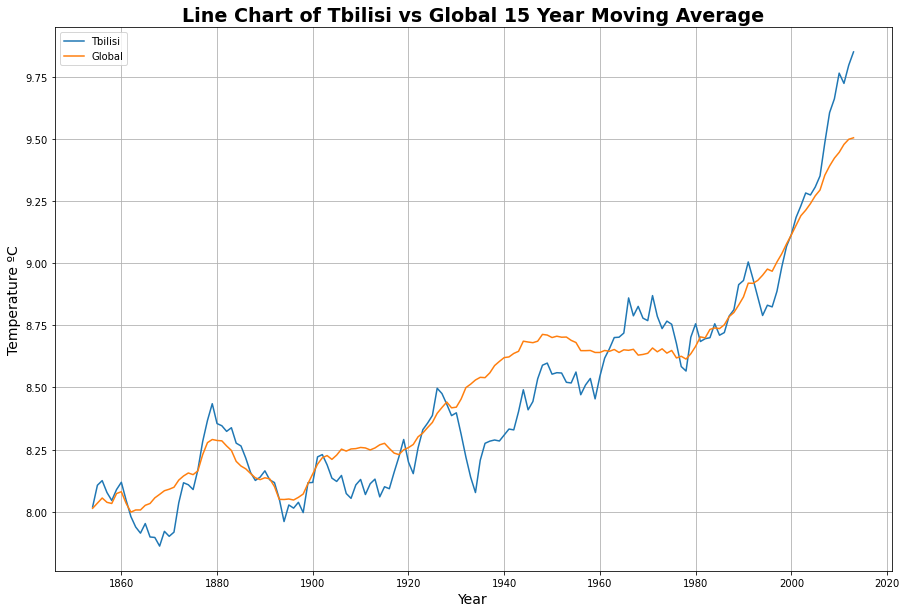

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(tbilisi, label = ["Tbilisi", "Global"])
ax.grid(axis='both')
ax.legend()



ax.set_title('Line Chart of Tbilisi vs Global 15 Year Moving Average', fontsize = 19, weight = 'bold')
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature ºC', fontsize = 14)


plt.show();

Line chart of 15 year moving averages of Tbilisi and Global temperatures.

### Observations

**OBSERVATION 1**: Judging by the line chart, temperature is on the rise both in Tbilisi and global scale. On average Tbilisi is cooler by 0.038. We can also notice pattern of average temperature of Tbilisi followiing the global average. But, starting from 1925 the pattern was broken on several occasions. For example, we can notice that in 1975 and late '90s average temperature of Tbilisi fell drastically, even though the global average is on the rise.

#### Average Temperature difference calculation

We can observe that overall average temperature is lower in Tbilisi compared to global average. But we cam observe, that in both cases graph is showing growing trend.

Average difference between temperatures was calculated using formula (<a href="https://cdat.llnl.gov/Jupyter-notebooks/vcs/Mathematical_Expressions_and_Symbols/Mathematical_Expressions_and_Symbols.html">markdown code source</a>):

>$$
  dif = \frac{\sum{(T_{t} - G_{t})}}{n}
$$

<p>dif _ average difference</p>
<p>t _ year</p>
<p>T _ Tbilisi temperature</p>
<p>G _ Global Temperature</p>
<p>n _ number of years</p>

In [14]:
# Average difference Tbilisi and global average temperature

round(np.mean(tbilisi['tbilisi_15y_mva'] - tbilisi['global_15y_mva']), 3)

-0.038

**OBSERVATION 2**: For both globe and Tbilisi, the temperature rise is considerable. Since 1843 to 2013 average temperature has risen by 22.8% in Tbilisi and by 18.6% over the globe. The correlation between these two variables is 0.952, which indicates that the direction of these two variables are directly proportional and they have strong relationship.<br>
High correlation between Tbilisi's and global temperature could indicate the spillover effect, meaning technological advancements over the world had reached Tbilisi, which in return affected the temperature. <br>
Standard deviation indicates that there was more fluctuation in temperature for Tbilisi, which could be connected with political and economical turmoils, which caused decrease in consumption. Good indication would be the period of 1940 till 1960. On the line chart in that time period we can see Tbilisi's average temperature is below global. During this period there was world war II, Georgia was an agricaltural part of Soviet Union and manufacturing had smaller portion, which was mostly in other cities rather than Tbilisi. Also, since year 2000 the temperature growth is more noticeable, when situation is beginning to stabilize.

**Table of statistical metrics**

| Location | Temperature Change | Correlation | Min | Max | Mean | Standard Deviation |
| -: | -: | -: | -: | -: | -: | -: |
| Tbilisi | 0.228 | 0.952 | 7.862 | 9.849 | 8.467 | 0.432 |
| Global | 0.186 | 0.952 | 7.999 | 9.504 | 8.504 | 0.376 |

In [15]:
# change from earliest date to last date.

print('Tbilisi: ' + str(
    round(((tbilisi['tbilisi_15y_mva'].loc[2013] - tbilisi['tbilisi_15y_mva'].loc[1854]) / 
                        tbilisi['tbilisi_15y_mva'].loc[1854]), 3)
     ))
print('Global: ' + str(
    round((tbilisi['global_15y_mva'].loc[2013] - tbilisi['global_15y_mva'].loc[1854]) / 
                        tbilisi['global_15y_mva'].loc[1854],3)))

Tbilisi: 0.228
Global: 0.186


In [16]:
# Correlation Matrix 

round(tbilisi.corr(),3)

,tbilisi_15y_mva,global_15y_mva
tbilisi_15y_mva,1.000,0.952
global_15y_mva,0.952,1.000


In [17]:
# min/max

print("Minimum of Tbilisi and Global Temperatures")
print(tbilisi.min())

print(" ")

print("Maximum of Tbilisi and Global Temperatures")
print(tbilisi.max())

Minimum of Tbilisi and Global Temperatures
tbilisi_15y_mva    7.862000
global_15y_mva     7.998667
dtype: float64
 
Maximum of Tbilisi and Global Temperatures
tbilisi_15y_mva    9.849333
global_15y_mva     9.504000
dtype: float64


In [18]:
# Mean

print('Average Temperature in Tbilisi: ' + str(tbilisi['tbilisi_15y_mva'].mean()))
print('Global Average Temperature: ' + str(tbilisi['global_15y_mva'].mean()))

Average Temperature in Tbilisi: 8.466620833333334
Global Average Temperature: 8.504416666666668


In [19]:
# Standard Deviation

print('Standard Deviation of Temperature in Tbilisi: ' + str(tbilisi['tbilisi_15y_mva'].std()))
print('Global Temperature Standard Deviation: ' + str(tbilisi['global_15y_mva'].std()))

Standard Deviation of Temperature in Tbilisi: 0.4323772075377969
Global Temperature Standard Deviation: 0.3757859818074523


**OBSERVATION 3**: Judging by the graph, global temperature is on the rise and world is getting hotter. The change is noticeable after 1975. The slope of global average temperature graph before 1975 was 0.005, when as after 1975 it increased till 0.023, meaning that rate of temperature growth has risen drastically.

**Slope Calculation Formula**

>$$
Slope = \frac{x_{2} - x_{1}}{y_{2} - y_{1}} 
$$

In [20]:
# Slope of global moving average before and after 1975

slope_bf1975 = (tbilisi['global_15y_mva'].loc[1975] - tbilisi['global_15y_mva'].loc[1854]) / (1975 - 1854)
slope_af1975 = (tbilisi['global_15y_mva'].loc[2013] - tbilisi['global_15y_mva'].loc[1975]) / (2013 - 1975)

print('Slope before 1975: ' + str(round(slope_bf1975, 3)))
print('Slope after 1975: ' + str(round(slope_af1975,3)))

Slope before 1975: 0.005
Slope after 1975: 0.023


**OBSERVATION 4**: The comparison with other cities indicate, that we have similar trend as in case of Tbilisi. As was mentioned via source, all these cities have cimilar climate and different level of development, but the rising trend of temperature is noticeable in all four cases.<br>

By all metrics Tbilisi is cooler (by temperature at least) than rest of the cities. Although we can notice, that compared to other cities, Tbilisi has second highest standard deviation. <br>

If we take a look at line chart of percentage change of average temperature over 100 year periods, its noticeable that Tbilisi has a much higher rise of temperature, than other cities. 

**Table of statistical metrics**

| Cities | Min | Max | Mean | St. Dev | Correlation With Global Temperature |
| --- | --- | --- | --- | --- | --- |
| Kabul | 13.752 | 15.565 | 14.298 | 0.430 | 0.954 |
| Tianjin | 11.129 | 13.123 | 11.845 | 0.480 | 0.972 |
| Skopje | 9.129 | 10.731 | 9.635 | 0.321 | 0.928 |
| Tbilisi | 7.862 | 9.850 | 8.467 | 0.432 | 0.952 |

#### Tbilisi vs Other cities

In [21]:
kabul['kabul_15y_mva'] = kabul['avg_temp'].rolling(mva).mean()
tianjin['tianjin_15y_mva'] = tianjin['avg_temp'].rolling(mva).mean()
skopje['skopje_15y_mva'] = skopje['avg_temp'].rolling(mva).mean()

cities_by_mva = [kabul['kabul_15y_mva'].values, tianjin['tianjin_15y_mva'].values, skopje['skopje_15y_mva'].values, 
                 tbilisi['tbilisi_15y_mva'].values]

col = ['kabul_15y_mva', 'tianjin_15y_mva', 'skopje_15y_mva', 'tbilisi_15y_mva']

cities_mva_df = pd.DataFrame(cities_by_mva, index=col).transpose()
cities_mva_df = cities_mva_df.set_index(kabul.index.values)

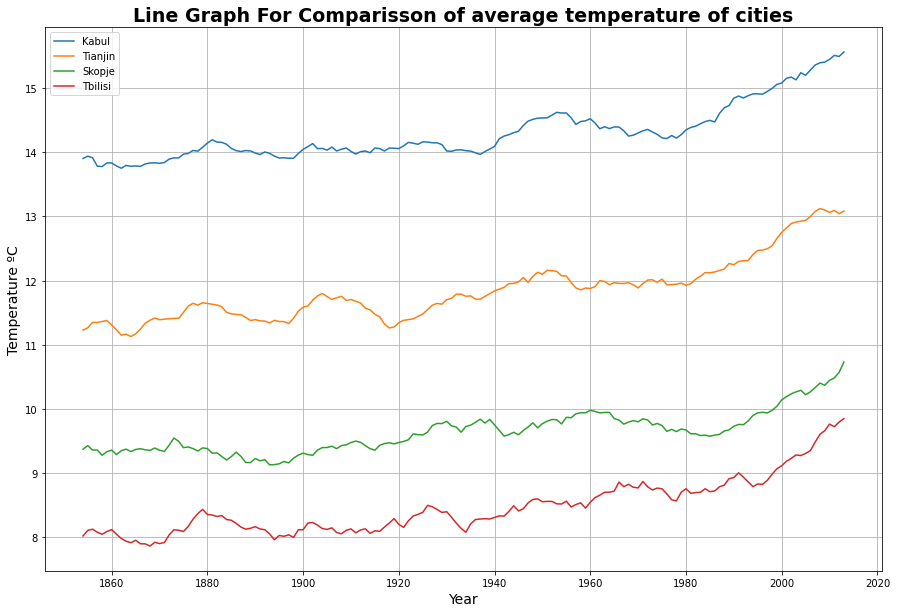

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(cities_mva_df, label = ['Kabul', 'Tianjin', 'Skopje', 'Tbilisi'])

ax.grid()
ax.set_title('Line Graph For Comparisson of average temperature of cities', fontsize = 19, weight = 'bold')
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature ºC', fontsize = 14)
ax.legend()

plt.show();

In [23]:
# Stadard deviation
cities_mva_df.std()

kabul_15y_mva      0.429578
tianjin_15y_mva    0.480026
skopje_15y_mva     0.320816
tbilisi_15y_mva    0.432377
dtype: float64

In [24]:
# Mean
cities_mva_df.mean()

kabul_15y_mva      14.297721
tianjin_15y_mva    11.844654
skopje_15y_mva      9.635438
tbilisi_15y_mva     8.466621
dtype: float64

In [25]:
# min
cities_mva_df.min()

kabul_15y_mva      13.752000
tianjin_15y_mva    11.128667
skopje_15y_mva      9.128667
tbilisi_15y_mva     7.862000
dtype: float64

In [26]:
# max
cities_mva_df.max()

kabul_15y_mva      15.565333
tianjin_15y_mva    13.122667
skopje_15y_mva     10.730667
tbilisi_15y_mva     9.849333
dtype: float64

In [27]:
cities_pct_change = cities_mva_df.pct_change(100)

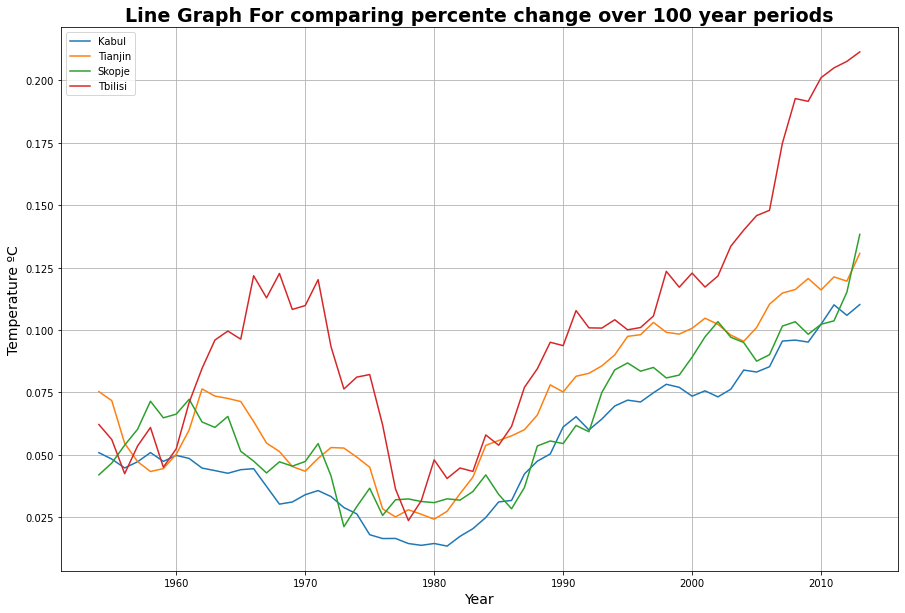

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(cities_pct_change, label = ['Kabul', 'Tianjin', 'Skopje', 'Tbilisi'])

ax.grid()
ax.set_title('Line Graph For comparing percente change over 100 year periods', fontsize = 19, weight = 'bold')
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature ºC', fontsize = 14)
ax.legend()

plt.show();

Line chart shows how average temperature changes in cities over 100 year periods in percentages.

In [29]:
# Correlation of the cities average temperature with global
cities_mva_df['global_15y_mva'] = tbilisi['global_15y_mva']

cities_mva_df.corr()

,kabul_15y_mva,tianjin_15y_mva,skopje_15y_mva,tbilisi_15y_mva,global_15y_mva
kabul_15y_mva,1.000000,0.962260,0.866270,0.947240,0.954245
tianjin_15y_mva,0.962260,1.000000,0.883488,0.937593,0.971561
skopje_15y_mva,0.866270,0.883488,1.000000,0.884792,0.928091
tbilisi_15y_mva,0.947240,0.937593,0.884792,1.000000,0.951558
global_15y_mva,0.954245,0.971561,0.928091,0.951558,1.000000


### Estimating temperature in Tbilisi based on global temperature

Using simple linear regression we can estimate temperature in Tbilisi based on global temperature.

#### Calculating regression to estimate average temperature in Tbilisi based on global temperature

In [30]:
y = tbilisi['tbilisi_15y_mva'].loc[1854:]
x = tbilisi['global_15y_mva'].loc[1854:]

In [31]:
x1 = sm.add_constant(x)

reg = sm.OLS(y, x1).fit()

/home/dl/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tbilisi_15y_mva   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1513.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           7.87e-83
Time:                        14:57:54   Log-Likelihood:                 96.325
No. Observations:                 160   AIC:                            -188.7
Df Residuals:                     158   BIC:                            -182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8445      0.240     -3.525      0.001      -1.318      -0.371
global_15y_mva     1.0949      0.028     38.901      0.000       1.039       1.150
==============================================================================
Omnibus:                        6.969   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.021
Skew:                          -0.513   Prob(JB):                       0.0299
Kurtosis:                       3.011   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the summary of the regression, adj. R-squared is 0.905, which tells us that independent variable (global average temperature) is viable for explaining most of the dependant variable (average temperature in Tbilisi). Also, p-value of coeficientes is less than 0.05, which means they are statistically significant and can be used for model, with which we will estimate temperature in Tbilisi. The model will be as follows:

$$
Tbilisi_temperature = global_temperature * global_temperature_coeficiente + constant
$$

Where:<br>
global_temperature_coeficiente = 1.0949<br>
constant = -0.8445